# Notebook Imports

In [1]:
import os
import sys
import re

import time
import random
import warnings

import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

import boston_valuation as val

warnings.filterwarnings('ignore')

pd.options.display.max_columns = 1000
pd.options.display.max_rows = 10000
pd.options.display.max_colwidth = -1

def seed_everything(seed=0):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

RANDOM_STATE = 1234
seed_everything(seed=RANDOM_STATE)

%matplotlib inline
sns.set()

(506, 1)


# Gather Data

In [2]:
boston_dataset = load_boston()

In [3]:
type(boston_dataset)

sklearn.utils.Bunch

In [4]:
boston_dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
dir(boston_dataset)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [6]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Data points and features

In [7]:
type(boston_dataset.data)

numpy.ndarray

In [8]:
boston_dataset.data.shape

(506, 13)

In [9]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [10]:
# actual house prices in thousands
boston_dataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

## Data exploration

In [11]:
# Create pandas dataframe
data = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)

# Add column with the price (target)
data['Price'] = boston_dataset.target

In [12]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.5380,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.4690,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.4690,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.4580,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.4580,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.4580,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.5240,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.5240,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.5240,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.5240,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [13]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [14]:
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [15]:
data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
Price      506
dtype: int64

## Cleaning data - check for missing values

In [16]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
Price      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


## Visualising data  

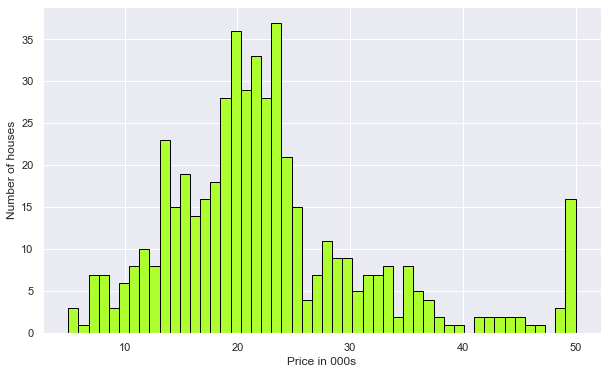

In [18]:
plt.figure(figsize=(10,6))
plt.hist(data['Price'], bins=50, ec='black', color='#ADFF2F')
plt.xlabel('Price in 000s')
plt.ylabel('Number of houses')
plt.show()

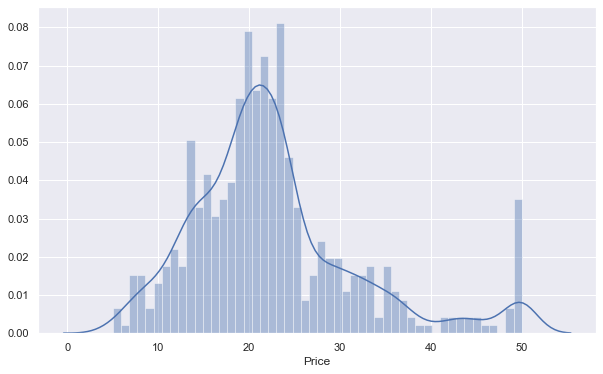

In [19]:
plt.figure(figsize=(10,6))
sns.distplot(data['Price'], bins=50, hist=True, kde=True)
plt.show()

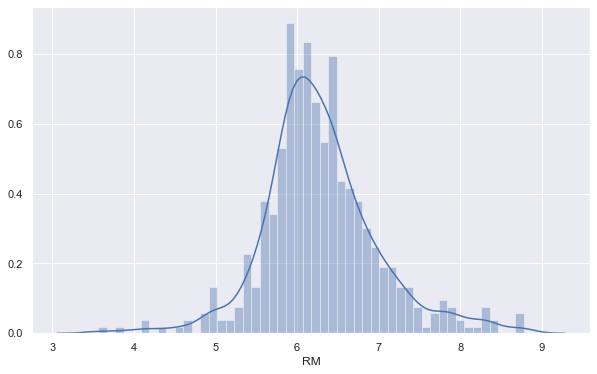

In [20]:
plt.figure(figsize=(10,6))
sns.distplot(data['RM'], bins=50, hist=True, kde=True)
plt.show()

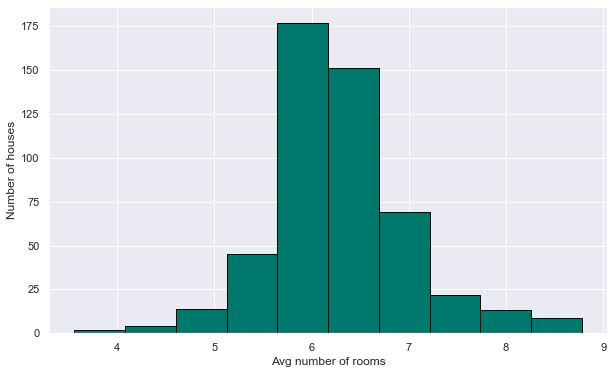

In [21]:
plt.figure(figsize=(10,6))
plt.hist(data['RM'], bins=10, ec='black', color='#00796c')
plt.xlabel('Avg number of rooms')
plt.ylabel('Number of houses')
plt.show()

In [22]:
print(data['RM'].mean())
print(data['RM'].median())

6.284634387351779
6.2085


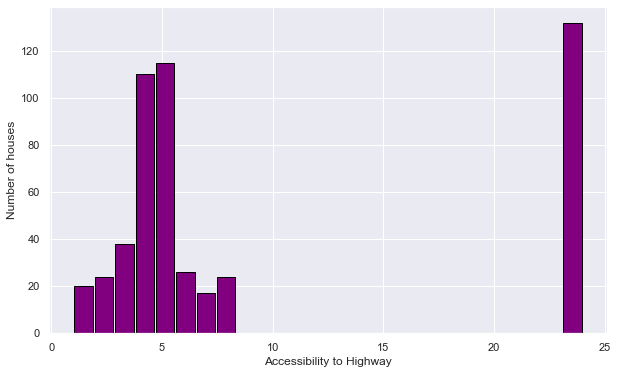

In [23]:
plt.figure(figsize=(10,6))
plt.hist(data['RAD'], bins=25, ec='black', color='#800080', rwidth=0.9)
plt.xlabel('Accessibility to Highway')
plt.ylabel('Number of houses')
plt.show()

In [24]:
data.RAD.max()

24.0

In [25]:
data['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0     38 
6.0     26 
8.0     24 
2.0     24 
1.0     20 
7.0     17 
Name: RAD, dtype: int64

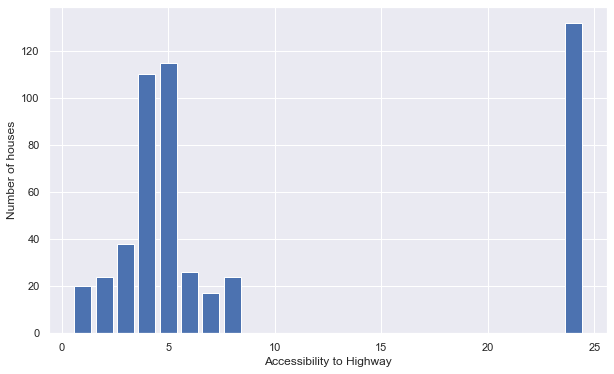

In [26]:
frequency = data['RAD'].value_counts()
# type(frequency)
# frequency.index
# frequency.axes[0]
plt.figure(figsize=(10,6))
plt.xlabel('Accessibility to Highway')
plt.ylabel('Number of houses')
plt.bar(frequency.index, height=frequency)
plt.show()

In [27]:
data['CHAS'].value_counts()

0.0    471
1.0    35 
Name: CHAS, dtype: int64

## Descriptive Statistics

In [28]:
print(data['Price'].min())
print(data['Price'].max())

5.0
50.0


In [29]:
data.min()

CRIM       0.00632  
ZN         0.00000  
INDUS      0.46000  
CHAS       0.00000  
NOX        0.38500  
RM         3.56100  
AGE        2.90000  
DIS        1.12960  
RAD        1.00000  
TAX        187.00000
PTRATIO    12.60000 
B          0.32000  
LSTAT      1.73000  
Price      5.00000  
dtype: float64

In [30]:
data.aggregate({'Price' : ['min','max','median', 'mean'],'RM':['min','max','median', 'mean']})

,Price,RM
min,5.000000,3.561000
max,50.000000,8.780000
median,21.200000,6.208500
mean,22.532806,6.284634


In [31]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Correlation

## $$ \rho _{XY} = corr(X,Y)$$
## $$ -1.0 \leq \rho _{XY} \leq +1.0 $$

In [32]:
data['Price'].corr(data['RM'])

0.695359947071539

In [33]:
data['Price'].corr(data['PTRATIO'])

-0.5077866855375619

In [34]:
data.corr() #Pearson Correlation Coefficients
# Pearson Correlation is only valid for numeric continuous variables

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [35]:
num_vars = data.select_dtypes(['int64','float64']).columns
num_vars

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [36]:
mask = np.zeros_like(data[num_vars].corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices]=True

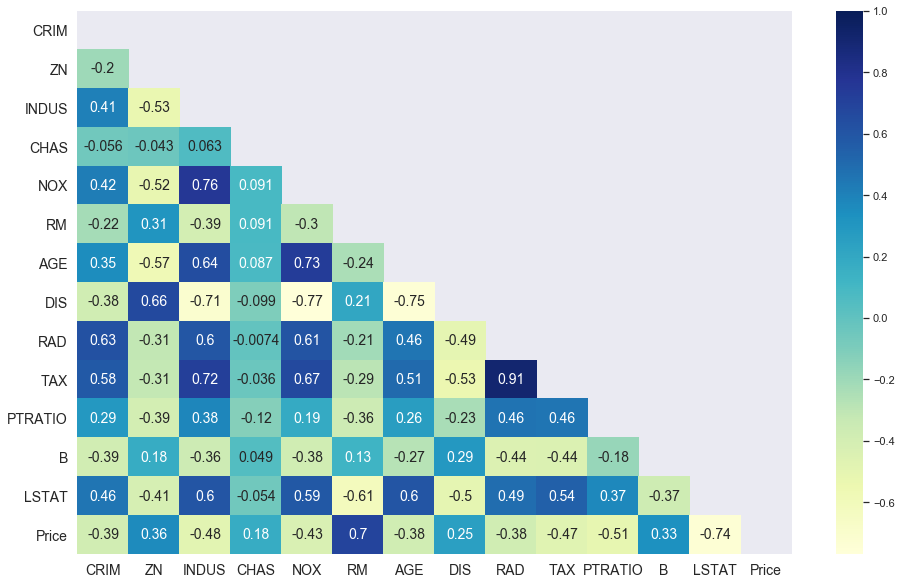

In [37]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), mask=mask,annot=True,
            annot_kws={'size':14}, cmap="YlGnBu")
sns.axes_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

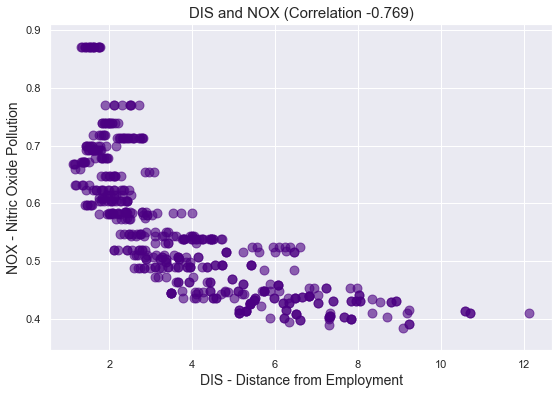

In [38]:
nox_dis_corr = round(data['NOX'].corr(data['DIS']), 3)

plt.figure(figsize=(9, 6))
plt.title(f'DIS and NOX (Correlation {nox_dis_corr})', fontsize=15)
plt.scatter(data['DIS'], data['NOX'], alpha=0.6, s=80, color='indigo')
plt.xlabel('DIS - Distance from Employment', fontsize=14)
plt.ylabel('NOX - Nitric Oxide Pollution', fontsize=14)

plt.show()

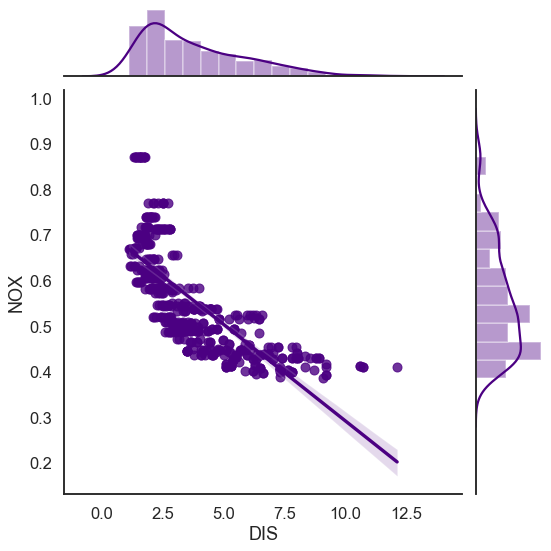

In [39]:
sns.set()
sns.set_style('white')
sns.set_context('talk')
sns.jointplot(x=data['DIS'], y=data['NOX'], kind='reg', size=8, color='indigo')
plt.show()

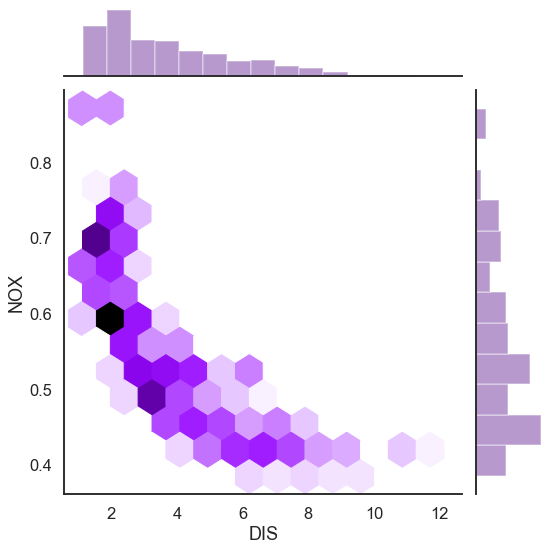

In [40]:
sns.set()
sns.set_style('white')
sns.set_context('talk')
sns.jointplot(x=data['DIS'], y=data['NOX'], kind='hex', 
              size=8, color='indigo',)
plt.show()

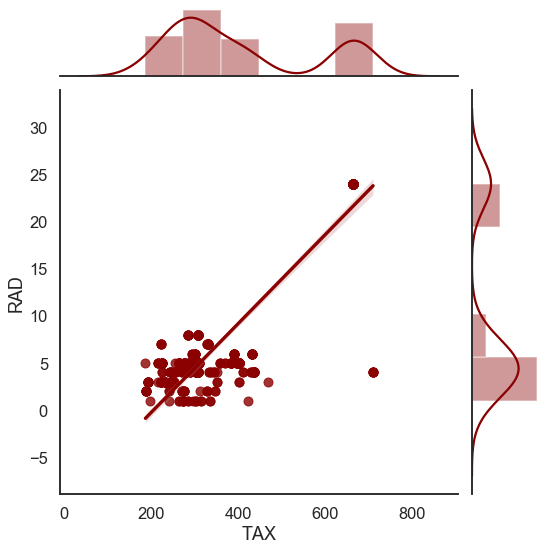

In [41]:
sns.set()
sns.set_style('white')
sns.set_context('talk')
sns.jointplot(x=data['TAX'], y=data['RAD'], kind='reg', size=8, color='darkred')
plt.show()

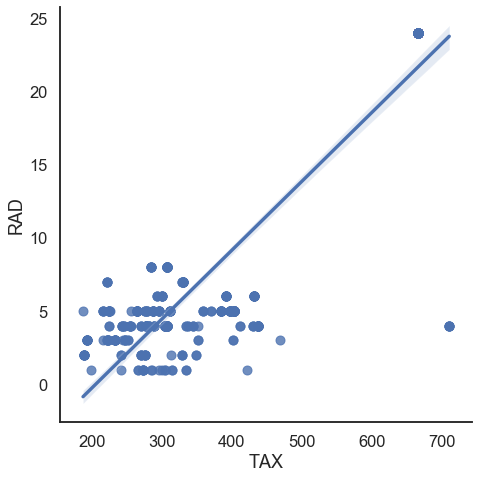

In [42]:
sns.lmplot(x='TAX',y='RAD', data=data, size=7)
plt.show()

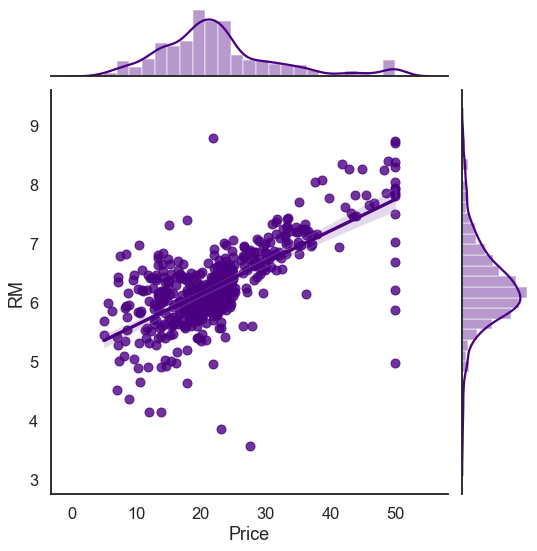

In [43]:
sns.set()
sns.set_style('white')
sns.set_context('talk')
sns.jointplot(x=data['Price'], y=data['RM'], kind='reg', size=8, color='indigo')
plt.show()

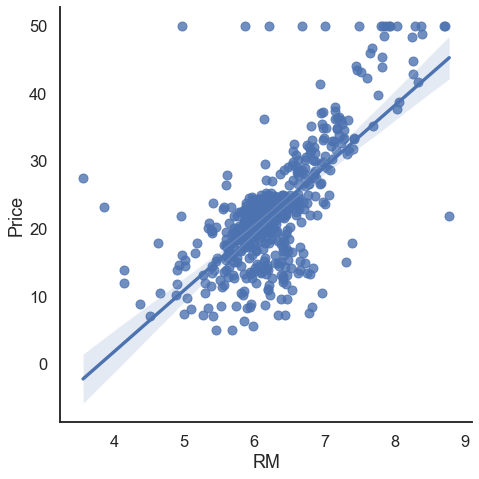

In [44]:
sns.lmplot(x='RM',y='Price', data=data, size=7)
plt.show()

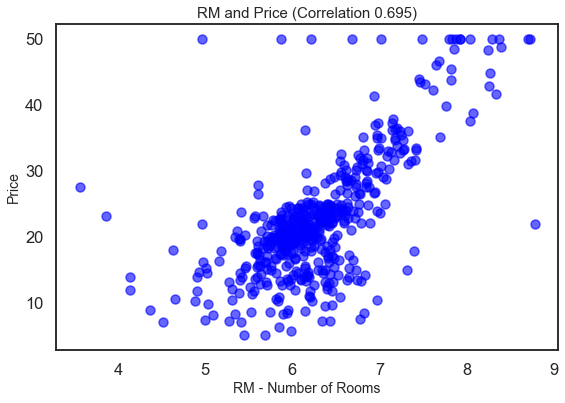

In [45]:
rm_tgt_corr = round(data['RM'].corr(data['Price']), 3)

plt.figure(figsize=(9, 6))
plt.title(f'RM and Price (Correlation {rm_tgt_corr})', fontsize=15)
plt.scatter(data['RM'], data['Price'], alpha=0.6, s=80, color='blue')
plt.xlabel('RM - Number of Rooms', fontsize=14)
plt.ylabel('Price', fontsize=14)

plt.show()

In [46]:
# sns.pairplot(data)
# plt.show()

In [47]:
# sns.pairplot(data, kind='reg', plot_kws={'line_kws':{'color':'cyan'}})
# plt.show()

## Training & Test Split

In [48]:
prices = data['Price']
features = data.drop('Price', axis=1)

x_train,x_test,y_train,y_test = train_test_split(features,
                                                prices,
                                                test_size=0.2,
                                                random_state=10)

## Multivariable Regression

In [49]:
regr = LinearRegression()
regr.fit(x_train, y_train)

print('Training data r-squared:', regr.score(x_train, y_train))
print('Test data r-squared:', regr.score(x_test, y_test))

print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=x_train.columns, columns=['coef'])


Training data r-squared: 0.750121534530608
Test data r-squared: 0.6709339839115642
Intercept 36.53305138282433


,coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


## Data Transformations

In [50]:
data['Price'].skew()

1.1080984082549072

In [51]:
y_log = np.log(data['Price'])
y_log.head()

0    3.178054
1    3.072693
2    3.546740
3    3.508556
4    3.589059
Name: Price, dtype: float64

In [52]:
y_log.skew()

-0.33032129530987864

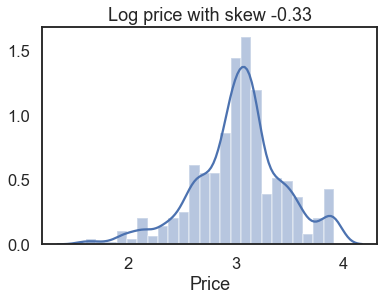

In [53]:
sns.distplot(y_log)
plt.title(f'Log price with skew {round(y_log.skew(),2)}')
plt.show()

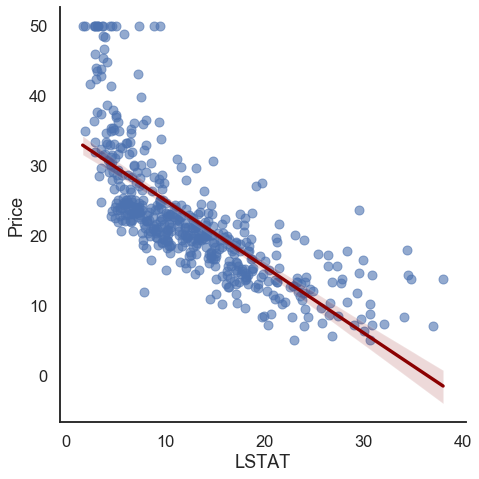

In [54]:
sns.lmplot(x='LSTAT', y='Price', data=data, size=7,
          scatter_kws={'alpha':0.6}, line_kws={'color':'darkred'})
plt.show()

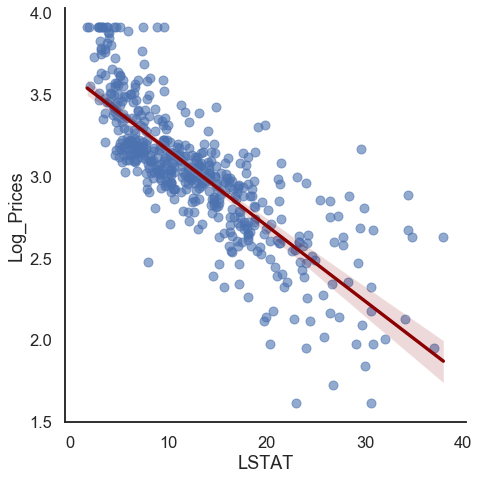

In [55]:
transformed_data = features
transformed_data['Log_Prices'] = y_log
sns.lmplot(x='LSTAT', y='Log_Prices', data=transformed_data, size=7,
          scatter_kws={'alpha':0.6}, line_kws={'color':'darkred'})
plt.show()

## Regression using log prices

In [56]:
prices = np.log(data['Price']) # use log price
features = data.drop('Price', axis=1)

x_train,x_test,y_train,y_test = train_test_split(
                                            features,
                                            prices,
                                            test_size=0.2,
                                            random_state=10)

regr = LinearRegression()
regr.fit(x_train, y_train)

print('Training data r-squared:', regr.score(x_train, y_train))
print('Test data r-squared:', regr.score(x_test, y_test))

print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=x_train.columns, columns=['coef'])


Training data r-squared: 0.7930234826697584
Test data r-squared: 0.7446922306260727
Intercept 4.059943871775184


,coef
CRIM,-0.010672
ZN,0.001579
INDUS,0.002030
CHAS,0.080331
NOX,-0.704068
RM,0.073404
AGE,0.000763
DIS,-0.047633
RAD,0.014565
TAX,-0.000645


In [57]:
np.e**0.080331

1.0836456950439142

## p-values & evaluating coefficients

In [58]:
x_incl_const = sm.add_constant(x_train)

model = sm.OLS(y_train, x_incl_const)
results = model.fit()

# results.params
# results.pvalues

pd.DataFrame({'coef':results.params, 'p-values':round(results.pvalues,4)})

,coef,p-values
const,4.059944,0.0000
CRIM,-0.010672,0.0000
ZN,0.001579,0.0086
INDUS,0.002030,0.4445
CHAS,0.080331,0.0382
NOX,-0.704068,0.0000
RM,0.073404,0.0001
AGE,0.000763,0.2092
DIS,-0.047633,0.0000
RAD,0.014565,0.0000


## Testing for Multicollinearity

$$ TAX = \alpha _0 + \alpha _1 RM + \alpha _2 NOX + ...+ \alpha _{12}LSTAT $$

$$ VIF_{TAX} = \frac{1}{(1 - R_{TAX} ^ 2)} $$

In [59]:
variance_inflation_factor(exog=x_incl_const.values, exog_idx=1)

1.7145250443932485

In [60]:
for i in range(x_incl_const.shape[1]):
    print(variance_inflation_factor(exog=x_incl_const.values, exog_idx=i))
    

597.5487126763895
1.7145250443932485
2.3328224265597597
3.9434488226746396
1.0788133385000576
4.410320817897635
1.8404053075678575
3.3267660823099394
4.222923410477865
7.314299817005058
8.508856493040817
1.8399116326514058
1.338671325536472
2.812544292793036


In [61]:
vif = []
for i in range(x_incl_const.shape[1]):
    vif.append(variance_inflation_factor(exog=x_incl_const.values, exog_idx=i))
print(vif)

[597.5487126763895, 1.7145250443932485, 2.3328224265597597, 3.9434488226746396, 1.0788133385000576, 4.410320817897635, 1.8404053075678575, 3.3267660823099394, 4.222923410477865, 7.314299817005058, 8.508856493040817, 1.8399116326514058, 1.338671325536472, 2.812544292793036]


In [62]:
vif = [variance_inflation_factor(exog=x_incl_const.values, 
                                 exog_idx=i) for i in range(x_incl_const.shape[1])]
pd.DataFrame({'coef_name': x_incl_const.columns,
             'VIF':np.around(vif,3)})

,coef_name,VIF
0,const,597.549
1,CRIM,1.715
2,ZN,2.333
3,INDUS,3.943
4,CHAS,1.079
5,NOX,4.410
6,RM,1.840
7,AGE,3.327
8,DIS,4.223
9,RAD,7.314


## Model Simplification & What is Bayesian Information Criterion (BIC)

In [63]:
# original model with log prices and all features
x_incl_const = sm.add_constant(x_train)

model = sm.OLS(y_train, x_incl_const)
results = model.fit()

org_coef = pd.DataFrame({'coef':results.params, 'p-values':round(results.pvalues,4)})
print('BIC is',results.bic)
print('AIC is',results.aic)
print('r-squared is',results.rsquared)

BIC is -139.74997769478898
AIC is -195.7697859862451
r-squared is 0.7930234826697584


In [64]:
# Reduced model #1 excluding INDUS
x_incl_const = sm.add_constant(x_train)
x_incl_const = x_incl_const.drop(['INDUS'],axis=1)

model = sm.OLS(y_train, x_incl_const)
results = model.fit()

coef_minus_indus = pd.DataFrame({'coef':results.params, 'p-values':round(results.pvalues,4)})
print('BIC is',results.bic)
print('AIC is',results.aic)
print('r-squared is',results.rsquared)

BIC is -145.14508855591185
AIC is -197.1634819694068
r-squared is 0.7927126289415163


In [65]:
# Reduced model #2 excluding INDUS, AGE
x_incl_const = sm.add_constant(x_train)
x_incl_const = x_incl_const.drop(['INDUS','AGE'],axis=1)

model = sm.OLS(y_train, x_incl_const)
results = model.fit()

reduced_coef = pd.DataFrame({'coef':results.params, 'p-values':round(results.pvalues,4)})
print('BIC is',results.bic)
print('AIC is',results.aic)
print('r-squared is',results.rsquared)

BIC is -149.49934294224656
AIC is -197.51632147778037
r-squared is 0.7918657661852814


In [66]:
frames = [org_coef, coef_minus_indus, reduced_coef]
pd.concat(frames, axis=1)

,coef,p-values,coef,p-values,coef,p-values
AGE,0.000763,0.2092,0.000766,0.2070,NaN,NaN
B,0.000516,0.0000,0.000511,0.0000,0.000518,0.0000
CHAS,0.080331,0.0382,0.082795,0.0320,0.086449,0.0249
CRIM,-0.010672,0.0000,-0.010721,0.0000,-0.010702,0.0000
DIS,-0.047633,0.0000,-0.049394,0.0000,-0.052692,0.0000
INDUS,0.002030,0.4445,NaN,NaN,NaN,NaN
LSTAT,-0.031390,0.0000,-0.031262,0.0000,-0.030271,0.0000
NOX,-0.704068,0.0000,-0.673365,0.0000,-0.616448,0.0001
PTRATIO,-0.034795,0.0000,-0.034126,0.0000,-0.033481,0.0000
RAD,0.014565,0.0000,0.014014,0.0000,0.013743,0.0000


## Resdiduals & Residual Plots

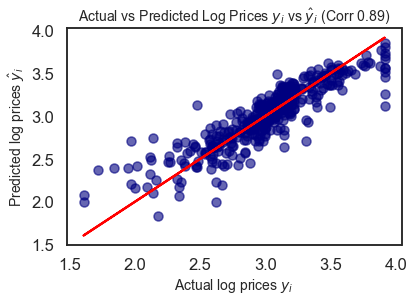

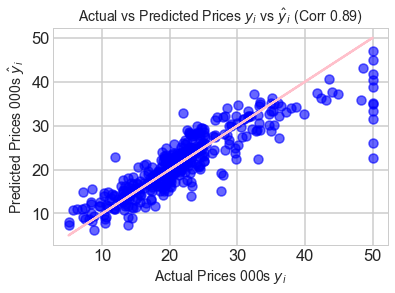

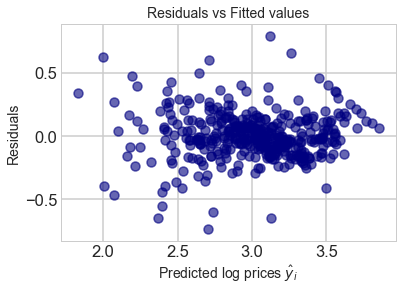

In [67]:
# modified model : transformed (using log prices) and simplified (dropping 2 features)
prices = np.log(data['Price']) # use log price
features = data.drop(['Price','INDUS', 'AGE'], axis=1)

x_train,x_test,y_train,y_test = train_test_split(
                                            features,
                                            prices,
                                            test_size=0.2,
                                            random_state=10)
# Using statsmodel
x_incl_const = sm.add_constant(x_train)
model = sm.OLS(y_train, x_incl_const)
results = model.fit()

# Resdiduals
# residuals = y_train - results.fittedvalues
# results.resid

# Graph of Actual vs. Predicted Prices
corr = round(y_train.corr(results.fittedvalues),2)
plt.scatter(x=y_train, y=results.fittedvalues, color='navy',alpha=0.6)
plt.plot(y_train, y_train, color='red')

plt.xlabel('Actual log prices $y _i$', fontsize=14)
plt.ylabel('Predicted log prices $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted Log Prices $y _i$ vs $\hat y _i$ (Corr {corr})', fontsize=14)
plt.style.use('seaborn-whitegrid')
plt.show()

plt.scatter(x=np.e**y_train, y=np.e**results.fittedvalues,alpha=0.6, c='blue')
plt.plot(np.e**y_train, np.e**y_train, color='pink')

plt.xlabel('Actual Prices 000s $y _i$', fontsize=14)
plt.ylabel('Predicted Prices 000s $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted Prices $y _i$ vs $\hat y _i$ (Corr {corr})', fontsize=14)
plt.style.use('seaborn-whitegrid')
plt.show()

# residuald vs predicted values
plt.scatter(x=results.fittedvalues, y=results.resid, alpha=0.6, c='navy')

plt.xlabel('Predicted log prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title(f'Residuals vs Fitted values', fontsize=14)
plt.style.use('seaborn-whitegrid')
plt.show()

# mean squared error & r-squared
reduced_log_mse = round(results.mse_resid, 3)
reduced_log_rsquared = round(results.rsquared, 3)


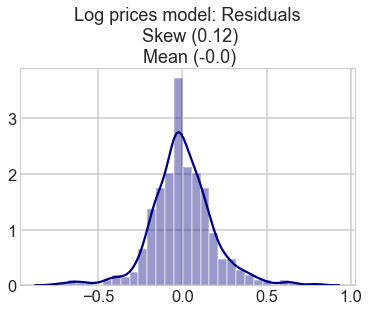

In [68]:
# Distribution of Residuals (log prices) - checking for normality
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 2)

sns.distplot(results.resid, color='navy')
plt.title(f'Log prices model: Residuals\n Skew ({resid_skew})\n Mean ({resid_mean})')
plt.show()

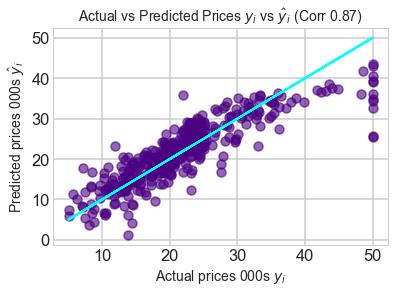

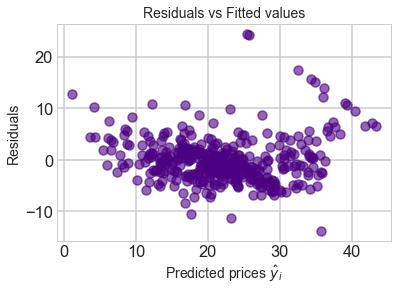

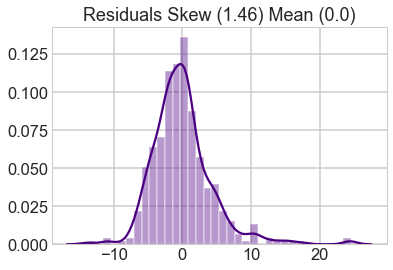

In [69]:
# original model : normal prices and all features
prices = data['Price'] 
features = data.drop(['Price'], axis=1)

x_train,x_test,y_train,y_test = train_test_split(
                                            features,
                                            prices,
                                            test_size=0.2,
                                            random_state=10)
# Using statsmodel
x_incl_const = sm.add_constant(x_train)
model = sm.OLS(y_train, x_incl_const)
results = model.fit()

# Graph of Actual vs. Predicted Prices
corr = round(y_train.corr(results.fittedvalues),2)
plt.scatter(x=y_train, y=results.fittedvalues, color='indigo',alpha=0.6)
plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Predicted prices 000s $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted Prices $y _i$ vs $\hat y _i$ (Corr {corr})', fontsize=14)
plt.style.use('seaborn-whitegrid')
plt.show()

# residuald vs predicted values
plt.scatter(x=results.fittedvalues, y=results.resid, alpha=0.6, c='indigo')

plt.xlabel('Predicted prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title(f'Residuals vs Fitted values', fontsize=14)
plt.style.use('seaborn-whitegrid')
plt.show()

# Residual Distribution Chart
# Distribution of Residuals (actual prices) - checking for normality
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 2)

sns.distplot(results.resid, color='indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

# mean squared error & r-squared
full_normal_mse = round(results.mse_resid, 3)
full_normal_rsquared = round(results.rsquared, 3)

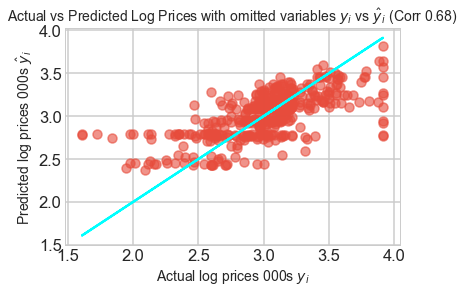

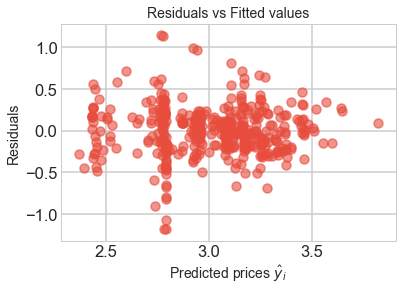

In [70]:
# Model Omitting Key Features using log prices
prices = np.log(data['Price'])
features = data.drop(['Price','INDUS','AGE','LSTAT','RM','NOX','CRIM'], axis=1)

x_train,x_test,y_train,y_test = train_test_split(
                                            features,
                                            prices,
                                            test_size=0.2,
                                            random_state=10)
# Using statsmodel
x_incl_const = sm.add_constant(x_train)
model = sm.OLS(y_train, x_incl_const)
results = model.fit()

# Graph of Actual vs. Predicted Prices
corr = round(y_train.corr(results.fittedvalues),2)
plt.scatter(x=y_train, y=results.fittedvalues, color='#e74c3c',alpha=0.6)
plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Actual log prices 000s $y _i$', fontsize=14)
plt.ylabel('Predicted log prices 000s $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted Log Prices with omitted variables $y _i$ vs $\hat y _i$ (Corr {corr})', fontsize=14)
plt.style.use('seaborn-whitegrid')
plt.show()

# residuald vs predicted values
plt.scatter(x=results.fittedvalues, y=results.resid, alpha=0.6, c='#e74c3c')

plt.xlabel('Predicted prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title(f'Residuals vs Fitted values', fontsize=14)
plt.style.use('seaborn-whitegrid')
plt.show()

# mean squared error & r-squared
omitted_var_mse = round(results.mse_resid, 3)
omitted_var_rsquared = round(results.rsquared, 3)


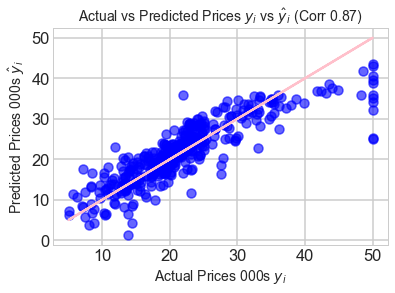

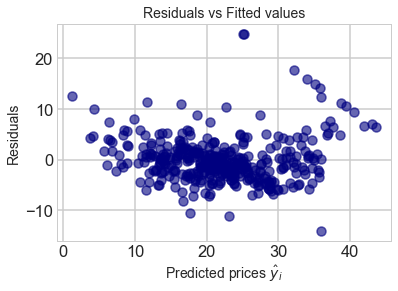

MSE : 19.884, R2  : 0.749


In [71]:
# modified model : transformed (using normal prices) and simplified (dropping 2 features)
prices = data['Price'] # use normal price
features = data.drop(['Price','INDUS', 'AGE'], axis=1)

x_train,x_test,y_train,y_test = train_test_split(
                                            features,
                                            prices,
                                            test_size=0.2,
                                            random_state=10)
# Using statsmodel
x_incl_const = sm.add_constant(x_train)
model = sm.OLS(y_train, x_incl_const)
results = model.fit()

# Resdiduals
# residuals = y_train - results.fittedvalues
# results.resid

# Graph of Actual vs. Predicted Prices
corr = round(y_train.corr(results.fittedvalues),2)


plt.scatter(x=y_train, y=results.fittedvalues,alpha=0.6, c='blue')
plt.plot(y_train, y_train, color='pink')

plt.xlabel('Actual Prices 000s $y _i$', fontsize=14)
plt.ylabel('Predicted Prices 000s $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted Prices $y _i$ vs $\hat y _i$ (Corr {corr})', fontsize=14)
plt.style.use('seaborn-whitegrid')
plt.show()

# residuald vs predicted values
plt.scatter(x=results.fittedvalues, y=results.resid, alpha=0.6, c='navy')

plt.xlabel('Predicted prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title(f'Residuals vs Fitted values', fontsize=14)
plt.style.use('seaborn-whitegrid')
plt.show()

# mean squared error & r-squared
reduced_mse = round(results.mse_resid, 3)
reduced_rsquared = round(results.rsquared, 3)

print(f'MSE : {reduced_mse}, R2  : {reduced_rsquared}')


In [72]:
pd.DataFrame({'R-Squared': [reduced_rsquared,reduced_log_rsquared, full_normal_rsquared, omitted_var_rsquared],
             'MSE': [reduced_mse, reduced_log_mse, full_normal_mse, omitted_var_mse],
             'RMSE': np.sqrt([reduced_mse, reduced_log_mse, full_normal_mse, omitted_var_mse])},
            index = ['Reduced Normal Price Model','Reduced Log Model','Full Normal Price Model','Omitted Var Model'])

,R-Squared,MSE,RMSE
Reduced Normal Price Model,0.749,19.884,4.459148
Reduced Log Model,0.792,0.035,0.187083
Full Normal Price Model,0.750,19.921,4.463295
Omitted Var Model,0.460,0.090,0.300000


In [73]:
# Our estimate for a house price is $30,000. 
# Calculating the upper and lower bound
# for a 95% prediction interval using the reduced log model

print("1 st.dev in log prices is", np.sqrt(reduced_log_mse))
print("2 st.dev in log prices is", 2*np.sqrt(reduced_log_mse))

upper_bound = np.log(30) + 2*np.sqrt(reduced_log_mse)
print('Upper bound in log prices for a 95% prediction interval is', round(upper_bound,3))
print(f'Upper bound for a 95% prediction interval is ${round(np.e**upper_bound*1000)}')

lower_bound = np.log(30) - 2*np.sqrt(reduced_log_mse)
print('Lower bound in log prices for a 95% prediction interval is', round(lower_bound,3))
print(f'Lower bound for a 95% prediction interval is ${round(np.e**lower_bound*1000)}')

1 st.dev in log prices is 0.18708286933869708
2 st.dev in log prices is 0.37416573867739417
Upper bound in log prices for a 95% prediction interval is 3.775
Upper bound for a 95% prediction interval is $43613.0
Lower bound in log prices for a 95% prediction interval is 3.027
Lower bound for a 95% prediction interval is $20636.0


In [74]:
val.get_dollar_estimate(rm=6, pt_ratio=10, next_to_river=True, large_range=False)

The estimated property value is USD 642725.46
At 68% confidence the valuation range is
USD 532831.65 at the lower end to USD 775284.3 at the high end.
